In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.
D:\PEMOGRAMAN\Anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\PEMOGRAMAN\Anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\PEMOGRAMAN\Anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\PEMOGRAMAN\Anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Fu

In [3]:
train= pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

In [5]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train =(train.iloc[:,1:].values).astype('float32')

In [9]:
y_train = train.iloc[:,0].values.astype('int32')

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
X_test = test.values.astype('float32')

In [12]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

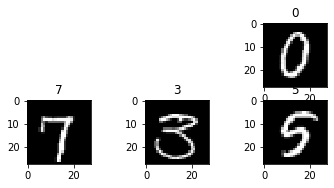

In [13]:
X_train = X_train.reshape(X_train.shape[0],28,28)

for i in range(5,9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [14]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [15]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [16]:
X_train.shape

(42000, 28, 28, 1)

In [17]:
X_test.shape

(28000, 28, 28, 1)

In [18]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(X):
    return (X-mean_px)/std_px

In [19]:
def standardize(X):
    return (X-mean_px)/std_px

In [20]:
standardize(1)

-0.41192079964865697

In [21]:
print(mean_px)
print(std_px)

33.408936
78.67759


In [22]:

for x in range(1,10):
    print(standardize(x))

-0.41192079964865697
-0.3992107000203347
-0.3865006003920124
-0.3737905007636901
-0.3610804011353678
-0.3483703015070455
-0.33566020187872325
-0.32295010225040094
-0.3102400026220787


In [23]:
print ( np.exp(-0.41192079964865697) + np.exp(-0.3992107000203347) + np.exp(-0.3865006003920124) + np.exp(-0.3737905007636901) + np.exp(-0.3610804011353678) + np.exp(-0.3483703015070455) + np.exp(-0.33566020187872325) + np.exp(-0.32295010225040094) + np.exp(-0.3102400026220787))
jumlah = [[ np.exp(-0.41192079964865697), np.exp(-0.3992107000203347) , np.exp(-0.3865006003920124), np.exp(-0.3737905007636901), np.exp(-0.3610804011353678), np.exp(-0.3483703015070455), np.exp(-0.33566020187872325), np.exp(-0.32295010225040094),np.exp(-0.3102400026220787)]]
print(np.sum(jumlah))
z1=-np.exp(0.41192079964865697)
z2=-np.exp(0.3992107000203347)
z3=-np.exp(0.3865006003920124)
z4=-0.3737905007636901
z5=-0.3610804011353678
z6=-0.3483703015070455
z7=-0.33566020187872325
z8=-0.32295010225040094
z9=-0.3102400026220787

soft_z1 = z1/jumlah
soft_z2 = z2/jumlah
soft_z3 = z3/jumlah


6.275684768665351
6.275684768665351


In [24]:
print(soft_z1)
print(soft_z2)
print(soft_z3)

[[-2.27923896 -2.25045293 -2.22203046 -2.19396696 -2.16625788 -2.13889877
  -2.11188519 -2.08521278 -2.05887723]]
[[-2.25045293 -2.22203046 -2.19396696 -2.16625788 -2.13889877 -2.11188519
  -2.08521278 -2.05887723 -2.0328743 ]]
[[-2.22203046 -2.19396696 -2.16625788 -2.13889877 -2.11188519 -2.08521278
  -2.05887723 -2.0328743  -2.00719977]]


In [25]:
from keras.utils.np_utils import to_categorical

In [26]:
y_train = to_categorical(y_train)

In [27]:
num_classes=y_train.shape[1]

In [28]:
num_classes

10

D:\PEMOGRAMAN\Anacoda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.XTick at 0x277b0b025c8>,
 <a list of 10 Text xticklabel objects>)

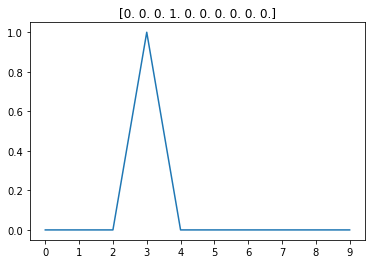

In [29]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))

In [30]:
seed = 43

np.random.seed(seed)

In [31]:
from keras.models import Sequential
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D,MaxPooling2D

In [32]:
model = Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

In [33]:
print('input_shape:',model.input_shape)
print('output_shape:',model.output_shape)

input_shape: (None, 28, 28, 1)
output_shape: (None, 10)


In [34]:
from keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001),
 loss = 'categorical_crossentropy',
 metrics = ['accuracy'])

In [35]:
from keras.preprocessing import image

gen = image.ImageDataGenerator()

In [36]:
X = X_train
y = y_train

X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.10, random_state=42)
batches= gen.flow(X_train,y_train, batch_size = 64)
val_batches= gen.flow(X_val,y_val,batch_size=64)

In [37]:
history = model.fit_generator(generator=batches,steps_per_epoch=batches.n,epochs=3,
                              validation_data=val_batches,validation_steps=val_batches.n)


Epoch 1/3
37800/37800 [==============================] - 120s 3ms/step - loss: 0.2408 - accuracy: 0.9338 - val_loss: 0.4529 - val_accuracy: 0.9091
Epoch 2/3
37800/37800 [==============================] - 142s 4ms/step - loss: 0.2169 - accuracy: 0.9410 - val_loss: 0.5122 - val_accuracy: 0.9050
Epoch 3/3
37800/37800 [==============================] - 211s 6ms/step - loss: 0.2113 - accuracy: 0.9427 - val_loss: 0.3276 - val_accuracy: 0.9034


In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

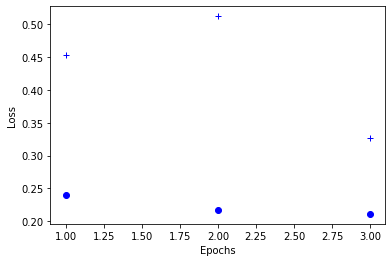

In [39]:
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

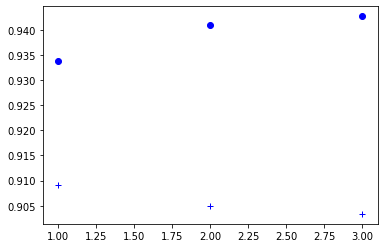

In [40]:
plt.clf()

acc_values= history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']

plt.plot(epochs,acc_values, 'bo')
plt.plot(epochs,val_acc_values, 'b+')

plt.show()

In [41]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
fc = get_fc_model()


In [43]:
history=fc.fit_generator(generator=batches,steps_per_epoch=batches.n, epochs=1,
                        validation_data=val_batches,validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 269s 7ms/step - loss: 0.1201 - accuracy: 0.9743 - val_loss: 1.2876 - val_accuracy: 0.9564


In [47]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [48]:
model = get_cnn_model()

In [49]:
history = model.fit_generator(generator = batches, steps_per_epoch=batches.n, epochs=1,
                             validation_data= val_batches,validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 572s 15ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.1651 - val_accuracy: 0.9900


In [52]:
predictions = model.predict_classes(X_test, verbose = 0)

submissions=pd.DataFrame({'ImageId': list(range(1,len(predictions)+1)),
                         'label':predictions})
submissions.to_csv('DigitRecognizer_pred.csv', index = False, header = True)